In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt


In [2]:
Data_cab = pd.read_csv('Cab_Data.csv')

In [3]:
Data_cab

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


# Data Type 

In [4]:
Data_cab.dtypes

Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

# Date of Travel column should be changed

In [5]:
# change the type of Date of Travel datatype into DateTime 
a = Data_cab['Date of Travel'].to_list()
base_date = pd.Timestamp('1899-12-29')
dates = [base_date + pd.DateOffset(date_offset) for date_offset in a]
Data_cab['Date of Travel'] = pd.to_datetime(dates, format='%y/%m/%d')

In [6]:
Data_cab

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,2018-01-07,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,2018-01-03,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,2018-01-04,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,2018-01-04,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [7]:
#checking company column
Data_cab['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [8]:
#Checking City column 
Data_cab['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [9]:
# Remove rows with null values
cleaned_df = Data_cab.dropna()

In [10]:
cleaned_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,2016-01-01,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,2016-01-06,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,2016-01-02,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,2018-01-07,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,2018-01-03,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,2018-01-04,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,2018-01-04,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


# There is no Duplicates and Null values from Cab data 

In [11]:
# Import City data 
city_df = pd.read_csv('City.csv')

In [12]:
city_df.head(5)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [13]:
# Remove rows with null values
cleaned_df1 = city_df.dropna()

In [15]:
Data Info
city_df.info()

SyntaxError: invalid syntax (<ipython-input-15-8f18bf6e5c05>, line 1)

In [16]:
# Population and User should be an integer

# Attribute 'Population' should be an integer
city_df['Population'] = [x.replace(',','') for x in city_df['Population']]
city_df['Population'] = city_df['Population'].astype(float)

# Attribute 'Users' should be an integer
city_df['Users'] = [x.replace(',','') for x in city_df['Users']]
city_df['Users'] = city_df['Users'].astype(float)

In [17]:
#Data Info
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        20 non-null     object 
 1   Population  20 non-null     float64
 2   Users       20 non-null     float64
dtypes: float64(2), object(1)
memory usage: 608.0+ bytes


In [18]:
#import Transaction Id dataframe 
transaction_id_df = pd.read_csv('Transaction_ID.csv')

In [19]:
transaction_id_df

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [20]:
#Data Info#
transaction_id_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [21]:
# Import Customer Id data 
customer_id_df = pd.read_csv('Customer_ID.csv')

In [22]:
customer_id_df

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [23]:
customer_id_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [24]:
# Remove rows with null values
cleaned_df1 = customer_id_df.dropna()

In [25]:
cleaned_df1

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [26]:
# merge and visualize all dataset
mergedata= Data_cab.merge(transaction_id_df, on= 'Transaction ID').merge(customer_id_df, on ='Customer ID').merge(city_df, on = 'City')

In [27]:
mergedata.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885.0,24701.0
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885.0,24701.0
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885.0,24701.0
3,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885.0,24701.0
4,10320494,2018-04-20,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885.0,24701.0


In [29]:
# Investigate the data to see which cab the user uses most
user=mergedata.groupby('Company')
avg_user = user.Users.mean()
index = avg_user.index
value = avg_user.values 

In [30]:
avg_user

Company
Pink Cab      125590.813330
Yellow Cab    168473.246981
Name: Users, dtype: float64

In [31]:
index

Index(['Pink Cab', 'Yellow Cab'], dtype='object', name='Company')

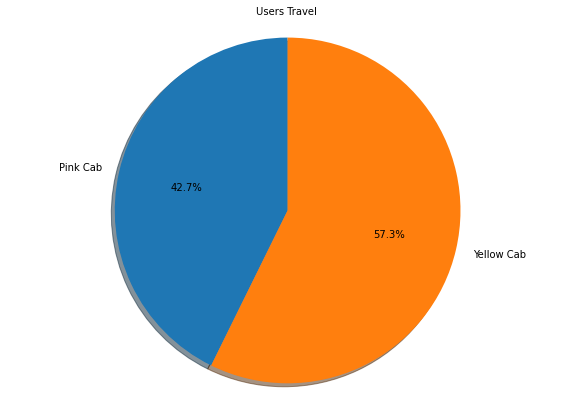

In [32]:
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(value , labels=index, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Users Travel', fontsize = 10)
plt.show()

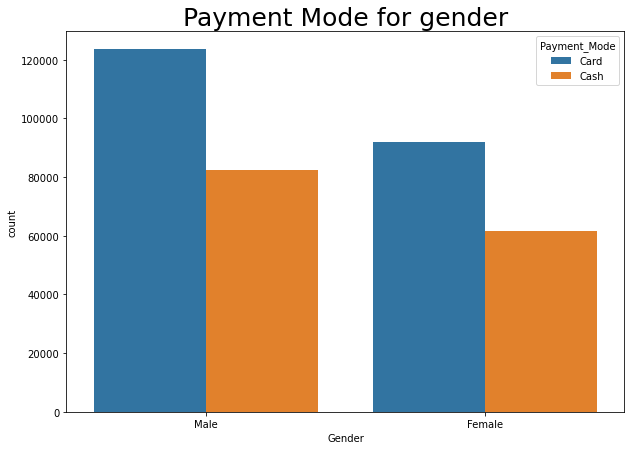

In [33]:
plt.figure(figsize = (10, 7))
ax = sns.countplot(x="Gender", hue="Payment_Mode", data=mergedata)
plt.title('Payment Mode for gender', fontsize=25)
plt.show()

# We can see from above chart male user prefer to pay by card compared to female users

In [36]:
# To check the corelation 
corr = mergedata.corr()
corr

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462,-0.016912,-0.001267,-0.001570,0.023868,0.013526
KM Travelled,-0.001429,1.000000,0.835753,0.981848,0.000389,-0.000369,-0.000544,-0.002311,-0.000428
Price Charged,-0.052902,0.835753,1.000000,0.859812,-0.177324,-0.003084,0.003228,0.326589,0.281061
Cost of Trip,-0.003462,0.981848,0.859812,1.000000,0.003077,-0.000189,-0.000633,0.015108,0.023628
Customer ID,-0.016912,0.000389,-0.177324,0.003077,1.000000,-0.004735,-0.013608,-0.647052,-0.610742
Age,-0.001267,-0.000369,-0.003084,-0.000189,-0.004735,1.000000,0.003907,-0.009002,-0.005906
Income (USD/Month),-0.001570,-0.000544,0.003228,-0.000633,-0.013608,0.003907,1.000000,0.011868,0.010464
Population,0.023868,-0.002311,0.326589,0.015108,-0.647052,-0.009002,0.011868,1.000000,0.915490
Users,0.013526,-0.000428,0.281061,0.023628,-0.610742,-0.005906,0.010464,0.915490,1.000000


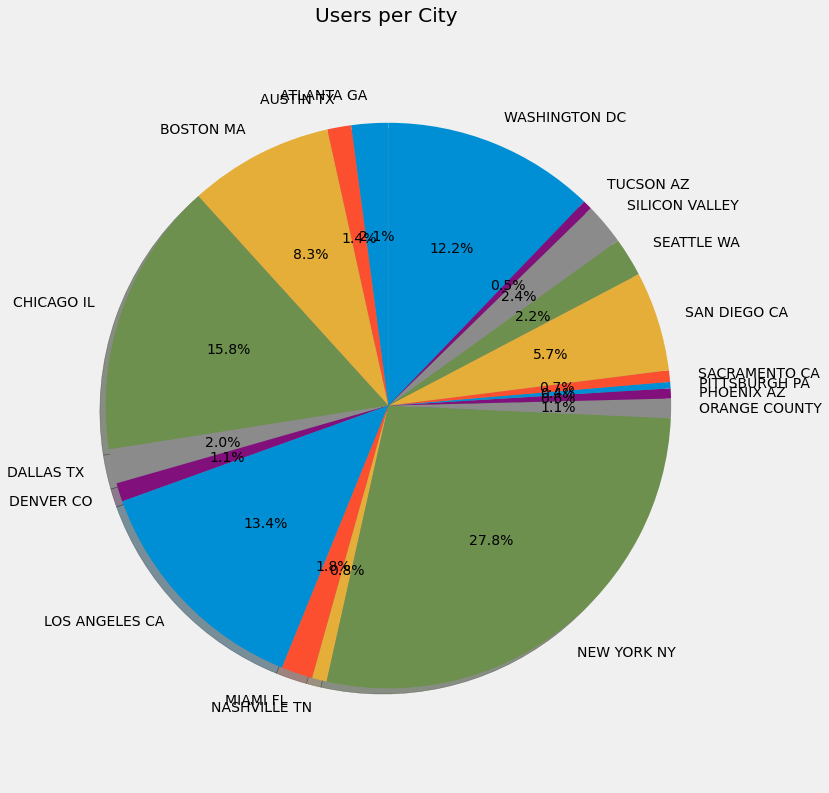

In [39]:
city_users = mergedata.groupby('City')
city_users = city_users.Users.count()
labs = city_users.index
vals = city_users.values

plt.style.use('fivethirtyeight')
figp, axp = plt.subplots(figsize=(10,13))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')
plt.title('Users per City')
plt.show()


# The most cab users are from Newyork city

In [51]:
# Gender
gender_cab=mergedata.groupby(['Company','Gender'])
gender_cab  = gender_cab['Customer ID'].nunique()
print(gender_cab)

Company     Gender
Pink Cab    Female    14819
            Male      17511
Yellow Cab  Female    18394
            Male      21502
Name: Customer ID, dtype: int64


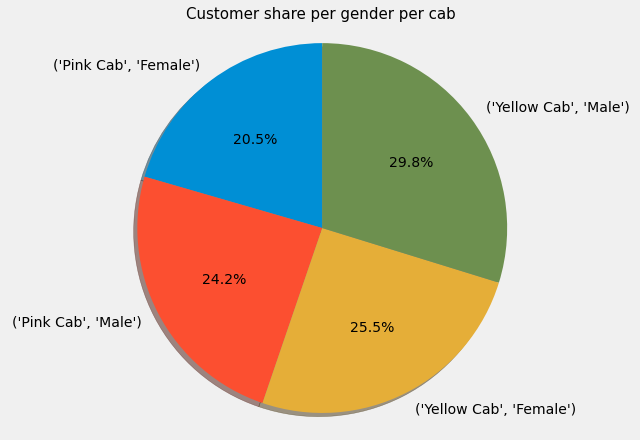

In [52]:
labs = gender_cab.index
vals = gender_cab.values
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Customer share per gender per cab', fontsize = 15)
plt.show()

◉ Male users are prefer more to travel in Cab
◉ Users prefer to travel in Yellow Cab

In [40]:
#Profit margin
company = mergedata.groupby('Company')
price_charged = company['Price Charged'].mean()
cost_trip = company['Cost of Trip'].mean()
c = cost_trip.index
c_v = cost_trip.values
c_p = price_charged.values

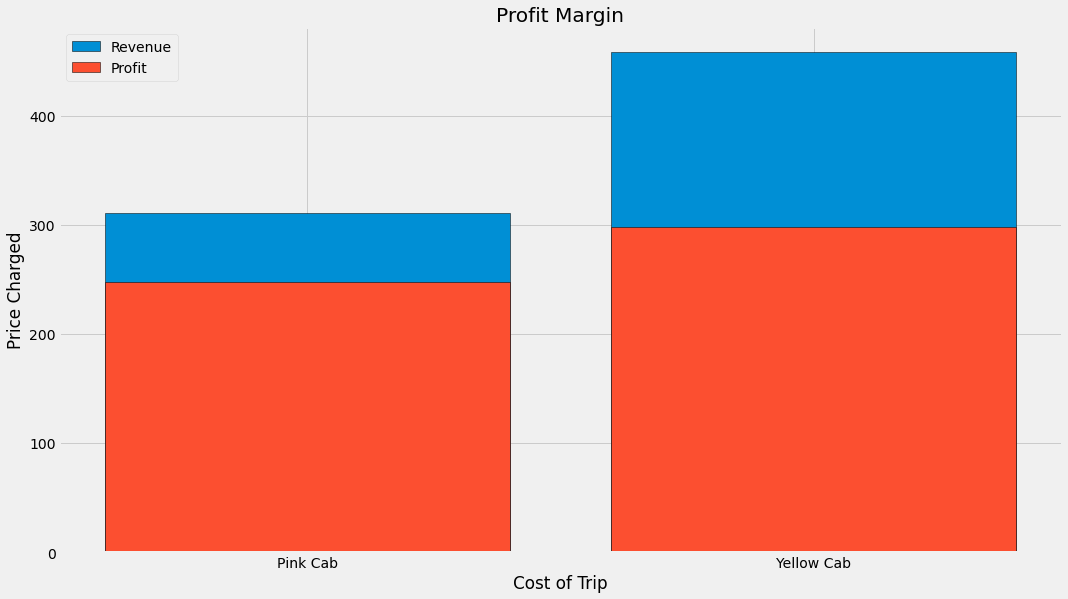

In [41]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (16, 9))
plt.bar(c, c_p, edgecolor='black', label="Revenue")
plt.bar(c, c_v, edgecolor='black', label="Profit")
plt.title('Profit Margin')
plt.ylabel('Price Charged')
plt.xlabel('Cost of Trip')
plt.legend()
plt.show()

# Yellow cab has the highest profit and Revenue compared to pink cab

In [44]:
mergedata['Year'] = mergedata['Date of Travel'].dt.year
mergedata['Month'] = mergedata['Date of Travel'].dt.month
mergedata['Day'] = mergedata['Date of Travel'].dt.day
mergedata['Profit'] = mergedata['Price Charged'] - mergedata['Cost of Trip']

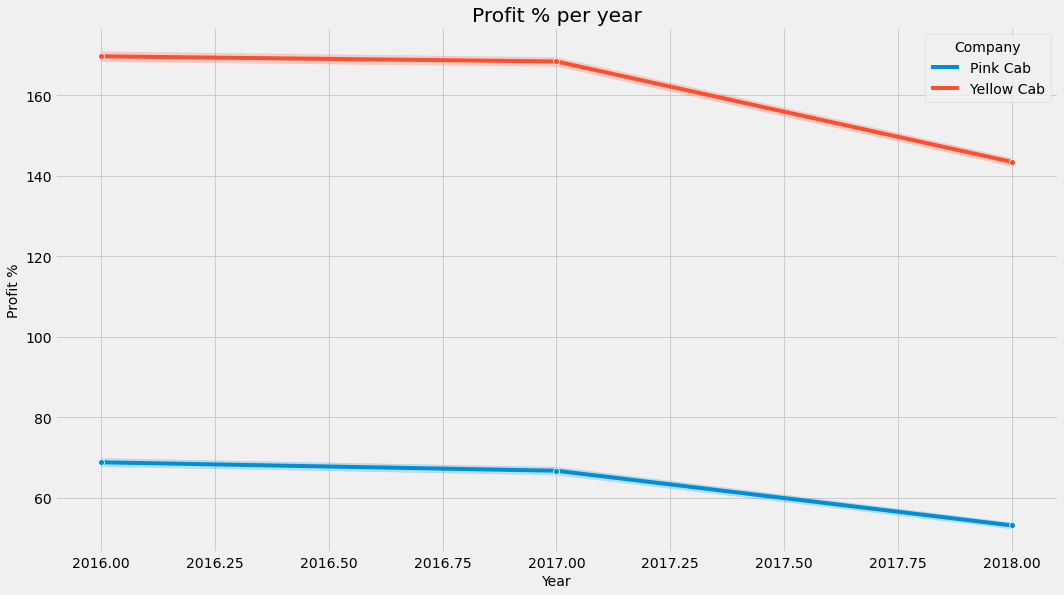

In [45]:
plt.figure(figsize = (16, 9))
sns.lineplot(x='Year', y='Profit', hue="Company", data=mergedata, marker='o')
plt.xlabel("Year", size=14)
plt.ylabel("Profit %", size=14)
plt.title("Profit % per year")
plt.show()

#Profit is decreased by both cab companies with respect to year

In [46]:
#Pink cab

In [48]:
a = mergedata[(mergedata['Payment_Mode']=='Cash')&(mergedata.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()
b = mergedata[(mergedata['Payment_Mode']=='Card')&(mergedata.Company=='Pink Cab')].groupby('Transaction ID').Profit.mean()

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference in payment mode for Pink Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference in payment mode for Pink Cab')

P value is  0.7900465828793288
We accept null hypothesis (H0) that there is no difference in payment mode for Pink Cab


In [49]:
#yellow cab

In [50]:
a = mergedata[(mergedata['Payment_Mode']=='Cash')&(mergedata.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()
b = mergedata[(mergedata['Payment_Mode']=='Card')&(mergedata.Company=='Yellow Cab')].groupby('Transaction ID').Profit.mean()

_, p_value = stats.ttest_ind(a.values,
                             b.values,
                             equal_var=True)

print('P value is ', p_value)

if(p_value<0.05):
    print('We accept alternative hypothesis (H1) that there is a difference in payment mode for Yellow Cab')
else:
    print('We accept null hypothesis (H0) that there is no difference in payment mode for Yellow Cab')

P value is  0.2933060638298729
We accept null hypothesis (H0) that there is no difference in payment mode for Yellow Cab


# There is no difference in payment mode 

# Summary

The above Exploratory Data Analysis (EDA) finds various dynamics of the data of two cab companies: Pink Cab and Yellow Cab. We found that there are no null values in the master dataframe. Yellow Cab is seen having more profit than the Pink Cab. Yellow cab is preferred by the users over pink cab. In summary yellow cab would be the preferred one to invest in.